<a href="https://colab.research.google.com/github/tahamsi/computer-vision/blob/main/week-8/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/computer-vision)

#Face Recognition

**Face recognition** is a biometric technology that identifies or verifies individuals by analyzing their facial features using computer vision and AI. It begins with face detection, followed by alignment to standardize the face’s orientation, feature extraction to create unique facial embeddings, and matching these against a database using similarity metrics. This technology has widespread applications in security, smartphone unlocking, access control, law enforcement, and social media. While it offers convenience and non-intrusiveness, challenges such as variations in lighting, facial expressions, and biases in training data can affect accuracy. Additionally, privacy concerns and potential for misuse raise ethical questions that must be addressed for responsible deployment.

**How Face Recognition Works**

* **Face Detection**: The process begins with detecting the presence of a face in an image or video frame. This step isolates the region of interest (the face) from the background. Algorithms such as Haar cascades, MTCNN (Multi-task Cascaded Convolutional Networks), and Dlib are commonly used for this purpose.

* **Face Alignment**: Once the face is detected, it is aligned to standardize the orientation and positioning. This step corrects variations in the angle or pose to ensure that the face is in a consistent format, which improves the accuracy of recognition.
* **Feature Extraction**: The aligned face is passed through a deep learning model or algorithm that extracts unique facial features and maps them to a high-dimensional vector space (known as an embedding). Popular models for feature extraction include FaceNet, VGGFace, and DeepFace.
* **Face Matching**: The extracted features (embeddings) are compared against a database of known embeddings to determine similarity. The comparison is typically done using distance metrics like Euclidean distance or cosine similarity. If the distance or similarity score is below a certain threshold, the model identifies the face as a match.

**Applications of Face Recognition**:
* **Security and Surveillance**: Used in security systems to identify individuals in real-time.
* **Smartphones and Devices**: Unlocking devices with face ID or biometric authentication.
* **Access Control**: Allowing authorized individuals into secure facilities.
* **Banking and Payments**: Verifying user identity for financial transactions.
* **Law Enforcement**: Identifying suspects or missing persons using surveillance footage.
* **Retail and Marketing**: Analyzing customer behavior and demographics.
* **Social Media**: Tagging people in photos and organizing image libraries.

**Challenges and Limitations**:
* Accuracy Variations: Performance can be affected by factors like lighting, pose, facial expressions, or occlusions (e.g., masks, sunglasses).
* Privacy Concerns: The use of face recognition raises ethical issues related to privacy and consent, as individuals may not always be aware they are being monitored.
* Bias: Face recognition models may exhibit bias due to training data that is not diverse enough, leading to lower accuracy for certain demographics.
* Spoofing: Systems need to be robust against spoofing attacks, such as using photos or videos to mimic a person’s face.

**Popular Face Recognition Models and Technologies**:
* FaceNet: Developed by Google, it maps faces into a Euclidean space for high-accuracy recognition and verification.
* DeepFace: Developed by Facebook, it was one of the first deep learning models for face recognition.
* VGGFace and VGGFace2: Trained on large datasets to improve face recognition accuracy.
* Dlib: An open-source toolkit for face detection and recognition.
* OpenCV: A computer vision library that includes basic face recognition capabilities and integration with other models.

#DeepFace

**DeepFace** is a deep learning model developed by Facebook as one of the first AI systems capable of performing human-level face verification. DeepFace demonstrated that deep learning could be effectively used to identify and verify human faces with high accuracy, even under challenging conditions like different poses, lighting variations, and facial expressions. This model can carry out facial attribute analysis (age, gender, emotion and race).

DeepFace uses a deep convolutional neural network (CNN) that maps facial images to a high-dimensional space where the distance between points represents facial similarity. It processes facial images to extract detailed features, enabling the model to learn complex patterns associated with facial identities.

DeepFace was trained on a massive dataset of millions of labeled images, enabling it to achieve human-level performance in face verification tasks. This extensive training made the model robust to various facial characteristics and conditions ([source](https://dergipark.org.tr/en/pub/gazibtd/issue/84331/1399077)).

# Prepare the environment

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Install the library.

In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=9f7f41adde9e4c38884021b12815f8eee2e991760c9f85f7b972093e8d073280
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


Import the required libraries

In [19]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

**Face Verification**

Download images.

In [40]:
!wget https://raw.githubusercontent.com/tahamsi/computer-vision/refs/heads/main/images/img-1.jpg
!wget https://raw.githubusercontent.com/tahamsi/computer-vision/refs/heads/main/images/img-2.jpg
!wget https://raw.githubusercontent.com/tahamsi/computer-vision/refs/heads/main/images/img-3.jpg
!wget https://raw.githubusercontent.com/tahamsi/computer-vision/refs/heads/main/images/img-4.jpg
!wget https://raw.githubusercontent.com/tahamsi/computer-vision/refs/heads/main/images/img-5.jpg
!wget https://raw.githubusercontent.com/tahamsi/computer-vision/refs/heads/main/images/img-6.jpg

!mkdir data
!mv img-2.jpg data/
!mv img-3.jpg data/
!mv img-4.jpg data/
!mv img-5.jpg data/
!mv img-6.jpg data/

--2024-11-03 02:05:37--  https://raw.githubusercontent.com/tahamsi/computer-vision/refs/heads/main/images/img-1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 429870 (420K) [image/jpeg]
Saving to: ‘img-1.jpg’

img-1.jpg           100%[===================>] 419.79K  --.-KB/s    in 0.05s   

2024-11-03 02:05:38 (8.48 MB/s) - ‘img-1.jpg’ saved [429870/429870]

--2024-11-03 02:05:38--  https://raw.githubusercontent.com/tahamsi/computer-vision/refs/heads/main/images/img-2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68335 (

Using `DeepFace.extract_faces(path-to-image)` you can detect faces in an image.

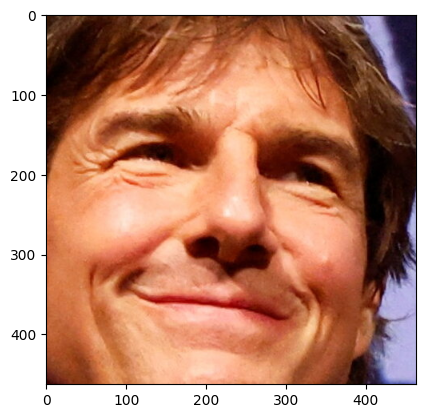

In [34]:
face = DeepFace.extract_faces("img-1.jpg")
plt.imshow(face[0]['face'])

`verify` verifies whether face pairs belong to the same person or different people. It accepts exact image paths as inputs, but it can also process numpy arrays or base64-encoded images. The function returns a dictionary, and you only need to check the `verified` key for the result.

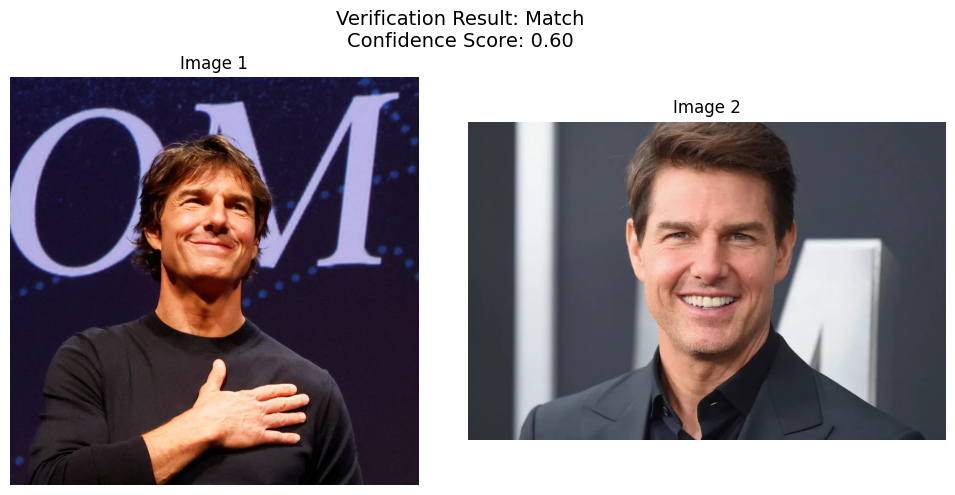

{'verified': True,
 'distance': 0.603059807370387,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 678,
   'y': 377,
   'w': 463,
   'h': 463,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 345,
   'y': 110,
   'w': 349,
   'h': 349,
   'left_eye': (580, 249),
   'right_eye': (450, 243)}},
 'time': 3.97}

In [36]:
result = DeepFace.verify(img1_path = "img-1.jpg", img2_path = "data/img-2.jpg",)

image1 = Image.open("img-1.jpg")
image2 = Image.open("data/img-2.jpg")

# Display the images side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title('Image 1')

axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title('Image 2')

plt.suptitle(f"Verification Result: {'Match' if result['verified'] else 'No Match'}\n"
             f"Confidence Score: {result['distance']:.2f}", fontsize=14)
plt.tight_layout()
plt.show()
result

**Face recognition**

Face recognition involves performing face verification multiple times. To streamline this process, `DeepFace` offers `find` function. This function searches for the identity of an input image within a specified database path and returns a list of pandas DataFrames as the output. Additionally, the facial `embeddings` of the database are stored in a pickle file to enable faster searches in future uses. The output size corresponds to the number of faces detected in the source image, and the target images in the database can also contain multiple faces.

24-11-03 02:05:59 - Found 5 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 5/5 [00:11<00:00,  2.27s/it]


24-11-03 02:06:10 - There are now 6 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
24-11-03 02:06:10 - Searching img-1.jpg in 6 length datastore
24-11-03 02:06:13 - find function duration 13.837952136993408 seconds


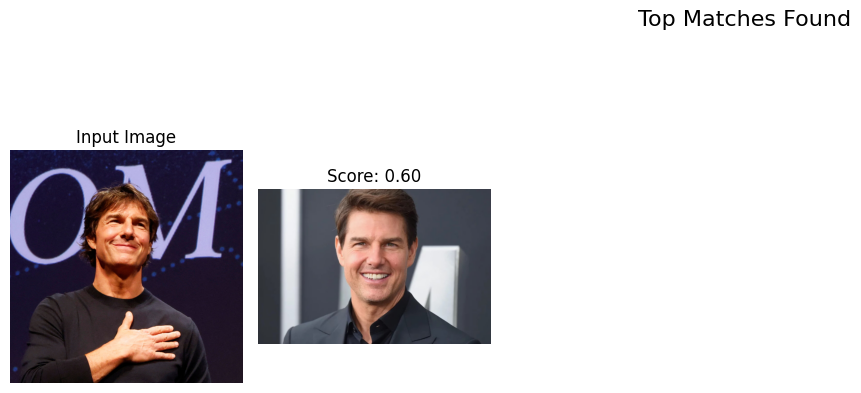

In [41]:
results = DeepFace.find(
  img_path = "img-1.jpg",
  db_path = "data/",
)

# Load the first DataFrame from the results
if results:
    result_df = results[0]  # Assuming multiple results are returned, pick the first DataFrame
    top_matches = result_df.head(5)  # Display the top 5 matches for visualization

    # Display the input image
    input_image = Image.open("img-1.jpg")
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 6, 1)
    plt.imshow(input_image)
    plt.axis('off')
    plt.title('Input Image')

    # Display the top matches from the database
    for i, row in enumerate(top_matches.itertuples()):
        match_image_path = row.identity  # Path to the matched image
        match_image = Image.open(match_image_path)
        plt.subplot(1, 6, i + 2)
        plt.imshow(match_image)
        plt.axis('off')
        plt.title(f"Score: {row.distance:.2f}")  # Display similarity score

    plt.suptitle("Top Matches Found", fontsize=16)
    plt.tight_layout()
    plt.show()

else:
    print("No matches found.")

**Embeddings**

Face recognition models convert facial images into unique, multi-dimensional vectors called **embeddings**, which represent distinct facial features numerically. These **embeddings** allow comparison between faces by calculating distances between their respective vectors; similar faces have **embeddings** that are close to each other in this space, while dissimilar faces are farther apart.

Sometimes, rather than performing direct face recognition or verification, you might need to work with the **embeddings** themselves, such as for clustering, additional analysis, or custom matching algorithms. For this purpose, **DeepFace** offers a `represent` function that extracts and returns these embeddings from an input image.

In [42]:
embeddings = DeepFace.represent(img_path = "img-1.jpg")

DeepFace contains several models and by assigning model names to `model_name` parameter you can specify it.

Models include `VGG-Face`, `Facenet`, `Facenet512`, `OpenFace`,  `DeepFace`, `DeepID`, `ArcFace`, `Dlib`, `SFace`, and `GhostFaceNet`.

Apart from models, there are different similarity metrics including `cosine`, `euclidean`, and `euclidean_l2` ( [source](https://github.com/serengil/deepface?tab=readme-ov-file)).

**Facial Attribute Analysis**

DeepFace includes a powerful facial attribute analysis module capable of predicting `age`, `gender`, `facial expressions` (such as `anger`, `fear`, `neutral`, `sadness`, `disgust`, `happiness`, and `surprise`), and `race` (including `Asian`, `White`, `Middle Eastern`, `Indian`, `Latino`, and `Black`).

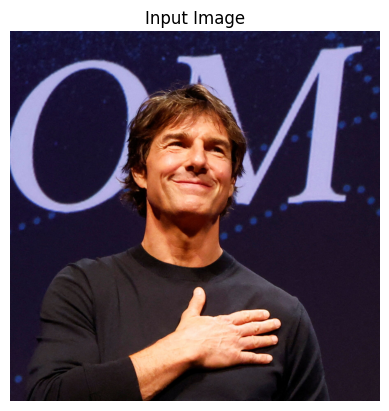

Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]

Analysis Results:


[{'age': 34,
  'region': {'x': 678,
   'y': 377,
   'w': 463,
   'h': 463,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.9,
  'gender': {'Woman': 0.03158353501930833, 'Man': 99.968421459198},
  'dominant_gender': 'Man',
  'emotion': {'angry': 0.003870677392114885,
   'disgust': 8.753299300667816e-10,
   'fear': 6.727052550559165e-05,
   'happy': 86.22835874557495,
   'sad': 0.005483412678586319,
   'surprise': 0.3783166641369462,
   'neutral': 13.383904099464417},
  'dominant_emotion': 'happy',
  'race': {'asian': 1.1017474469401725e-05,
   'indian': 8.173149354623577e-07,
   'black': 2.8924270943053657e-09,
   'white': 99.94662403424073,
   'middle eastern': 0.017258458558081367,
   'latino hispanic': 0.03610874258160503},
  'dominant_race': 'white'}]

In [45]:


# Load and display the image
image_path = 'img-1.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.title("Input Image")
plt.show()

# Use the VGGFace2 model for face recognition
result = DeepFace.analyze(img_path=image_path, actions=['age', 'gender', 'emotion', 'race'])

# Print the result
print("Analysis Results:")
result

# To use VGGFace2 for facial verification between two images:
# result = DeepFace.verify(img1_path="path/to/image1.jpg", img2_path="path/to/image2.jpg", model_name="VGG-Face")

# Print the verification result (uncomment to use)
# print("Verification Result:")
# print(result)
